## Data Inspiration
<p>I was watching ODI cricket match yesterday (21st Oct '18). India vs WestIndies. Both Rohit and Virat were well settled on crease with 200 run partnership. virat was close to 150 and i saw a dialog box on TV stating kohli just needs another 154 runs to reach 10k Runs. To join the group of elite Batsmen alongside Sachin, Pointing and Dravid. I was little surprised to see him reach close to the milestone so soon. </p>
<p>Then it stuck me, the amount of data in cricket. There's huge data in cricket. Data from 4's and 6's by a batsman in a match to number of balls faced in his test career.</p>
<p>It din't take me long to search for perfect website to find those stats. In India, cricket is a religion after all. I landed on cricinfo, searched for stats and found <a href='http://stats.espncricinfo.com/ci/content/records/335431.html'>this</a> webpage containing data of every single test match ever recorded or reported.</p>
<p>So, i dug in, scraped the data to analyse every stat i could imagine</p>

### Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Scraping with Beautiful soup

In [2]:
r = requests.get('http://stats.espncricinfo.com/ci/content/records/335431.html')
r.text[0:500]

'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<!-- hostname: web003, edition-view: espncricinfo-en-in, country: unknown, cluster: www, created: 2018-11-14 03:09:00 -->\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/" >\n<head>\n <script type="text/javascript">var _sf_startpt=(new Date())'

In [3]:
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
stats = soup.find_all('tr', attrs={'class':'data1'})
print("The resulting object is of type {}".format(type(stats)))
print("Total number of results, i.e total no of tests played till date are: {}".format(len(stats)))

The resulting object is of type <class 'bs4.element.ResultSet'>
Total number of results, i.e total no of tests played till date are: 740


The Whole Data is present in form of a list in the <i>bs4.element.ResultSet</i>. 
<p>Each test series is in form of an element in list.</p>
<p>Below is the structure of data in each element</p>

In [5]:
stats[0]

<tr class="data1" data-days="685654">
<td class="left"><a class="data-link" href="/ci/engine/series/60260.html">England in Australia Test Series</a></td>
<td class="left" nowrap="nowrap">1876/77</td>
<td nowrap="nowrap"></td>
<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/1126861.html">drawn</a></td>
<td nowrap="nowrap">1-1 (2)</td>
</tr>

### Formatting html data into tabular format (Dataframe) 

### Data Structure of each table row of the data table
- The Number 685654 in data-days attribute. Such numbers notably unique are present in all elements. must mean something.
- The pathname of link to direct to page containing the test series results
- The Test Series teams playing. It gives information about the home team and the away team.
- The year the test series is played in
- A link inside 4th td tag leading to the winning team's page. It's throwing 404 (Page not Found) error for drawn series.
- The numerical Result of the series
- Total number of matches played in the series. ( Given in the Bracket )

So, the features (and it's values as per the first row) can be :
<p>
    <b>data-days</b> 685654<br>
    <b>Match link</b> /ci/engine/series/60260.html<br>
    <b>teams playing</b> England in Australia Test Series<br>
    <b>Year</b> 1876/77<br>
    <b>Team Won</b> Drawn<br>
    <b>Result</b> 1-1 (first number corresponds to winner)<br>
    <b>Matches Played</b> 2<br>
</p>

<p>The Dataframe would look something like this: </p>
<table>
    <thead>
    <tr>
        <td><b>data-days</b></td>
        <td><b>Series link</b></td>
        <td><b>Teams playing</b></td>
        <td><b>Year</b></td>
        <td><b>Team Won</b></td>
        <td><b>Result</b></td>
        <td><b>Matches Played</b></td>
    </tr>
    </thead>
    <tr>
        <td>685654<br></td>
        <td>/ci/engine/series/60260.html<br></td>
        <td>England in Australia Test Series<br></td>
        <td>1876/77<br></td>
        <td>Drawn<br></td>
        <td>1-1<br></td>
        <td>2<br></td>
    </tr>
</table>

- We can Further divide the Team playing into Home team and away team. Some of the Series have Series name embedded in this section. So, we can add another column <b>Series Name</b> to it. 
- We can divide the Year to series <b>starting Year</b> and <b>ending Year</b>
- The Result can be divided into <b>Home wins</b> and <b>away wins</b>

<p>With updated features, the dataframe would look like this: </p>
<table>
    <thead>
    <tr>
        <td><b>datadaysId</b></td>
        <td><b>Link</b></td>
        <td><b>Name</b></td>
        <td><b>Home</b></td>
        <td><b>Away</b></td>
        <td><b>startYear</b></td>
        <td><b>endYear</b></td>
        <td><b>TeamWon</b></td>
        <td><b>HomeWins</b></td>
        <td><b>AwayWins</b></td>
        <td><b>Matches</b></td>
    </tr>
    </thead>
    <tr>
        <td>685654</td>
        <td>/ci/engine/series/60260.html</td>
        <td></td>
        <td>Australia</td>
        <td>England</td>
        <td>1876</td>
        <td>1877</td>
        <td>Drawn</td>
        <td>1</td>
        <td>1</td>
        <td>2</td>
    </tr>
</table>

Now that we have format of the features, let's separate the values from the bs4 Resultset

In [6]:
final_result = stats[-2]
final_result

<tr class="data1" data-days="737372">
<td class="left"><a class="data-link" href="/ci/engine/series/1140378.html">England in Sri Lanka Test Series</a></td>
<td class="left" nowrap="nowrap">2018/19</td>
<td nowrap="nowrap"></td>
<td class="left" nowrap="nowrap">-</td>
<td nowrap="nowrap"></td>
</tr>

This series is the inspiration for my data. So, this data is updated till date.

In [7]:
records = []
for series in stats:
    datadaysId = int(series['data-days'])
    Link = series.find('a').get('href')
    teams_text = series.find_all('td')[0].text
    years = series.find_all('td')[1].text
    winner = series.find_all('td')[3].text
    result = series.find_all('td')[4].text
    records.append((datadaysId, Link, teams_text, years, winner, result))

In [8]:
records[-3:]

[(737351,
  '/ci/engine/series/1157363.html',
  'Pakistan v Australia Test Series (in United Arab Emirates)',
  '2018/19',
  'Pakistan',
  '1-0 (2)'),
 (737372,
  '/ci/engine/series/1140378.html',
  'England in Sri Lanka Test Series',
  '2018/19',
  '-',
  ''),
 (737378,
  '/ci/engine/series/1153632.html',
  'Zimbabwe in Bangladesh Test Series',
  '2018/19',
  '-',
  '')]

In [9]:
series = pd.DataFrame(records, columns=['datadaysID', 'link', 'teams_text', 'years', 'winner', 'result'])
series.head(5)

,datadaysID,link,teams_text,years,winner,result
0,685654,/ci/engine/series/60260.html,England in Australia Test Series,1876/77,drawn,1-1 (2)
1,686294,/ci/engine/series/60261.html,England in Australia Test Match,1878/79,Australia,1-0 (1)
2,686907,/ci/engine/series/60262.html,Australia in England Test Match,1880,England,1-0 (1)
3,687459,/ci/engine/series/60263.html,England in Australia Test Series,1881/82,Australia,2-0 (4)
4,687627,/ci/engine/series/60264.html,Australia in England Test Match,1882,Australia,1-0 (1)


In [10]:
series.tail(6)

,datadaysID,link,teams_text,years,winner,result
734,737263,/ci/engine/series/1142576.html,South Africa in Sri Lanka Test Series,2018,Sri Lanka,2-0 (2)
735,737313,/ci/engine/series/1119531.html,Pataudi Trophy (India in England),2018,England,4-1 (5)
736,737346,/ci/engine/series/1157748.html,West Indies in India Test Series,2018/19,India,2-0 (2)
737,737351,/ci/engine/series/1157363.html,Pakistan v Australia Test Series (in United Ar...,2018/19,Pakistan,1-0 (2)
738,737372,/ci/engine/series/1140378.html,England in Sri Lanka Test Series,2018/19,-,
739,737378,/ci/engine/series/1153632.html,Zimbabwe in Bangladesh Test Series,2018/19,-,


## Feature Extraction

Let's now see how the data is distributed across the whole Dataframe and if any data is outside the patern we assumed for each feature.

### 1. datadaysID

In [11]:
print("Total number of datadaysID elements are {}, number of unique id elements are {}".format(len(series), series['datadaysID'].nunique()))

Total number of datadaysID elements are 740, number of unique id elements are 731


9 datadaysID values are repeated. Lets check some of the most frequent datadaysID values

In [12]:
# Top 3 most occuring datadaysID values
series['datadaysID'].value_counts()[:3]

731538    2
733630    2
732576    2
Name: datadaysID, dtype: int64

We can see that some of the datadaysID are not unique. There aren't any specific patterns for similar datadaysID values too (as shown below). Since we don't even know what the field represents in cricketing terminology, we can ignore the feature while analysing. But let's save it for now in the Dataframe.

In [13]:
series[series['datadaysID'] == 731538]

,datadaysID,link,teams_text,years,winner,result
475,731538,/ci/engine/series/60737.html,Pakistan in Zimbabwe Test Series,2002/03,Pakistan,2-0 (2)
476,731538,/ci/engine/series/60736.html,Sri Lanka in South Africa Test Series,2002/03,South Africa,2-0 (2)


### 2. link

In [14]:
print("Total number of links are {}, number of unique links are {}".format(len(series), series['link'].nunique()))

Total number of links are 740, number of unique links are 740


Each link representing a html page containing scorecard summary of each match in that series. There are no duplicate links.

### 3. teams_text

In [15]:
series['teams_text'].value_counts()[:5]

The Ashes (England in Australia)              35
The Ashes (Australia in England)              35
England in New Zealand Test Series            18
New Zealand in England Test Series            17
The Wisden Trophy (West Indies in England)    16
Name: teams_text, dtype: int64

The most common series is "The Ashes" with most number of matches played. 
<p>Some of the Series have names. All the teams we checked are in (Team A in Team B) format. <br>
    We can find the countries by slicing at <b style="color: green"><u>in</u></b> and checking if the strings (countries or part of their country names) are present in test playing nations. </p>
<p>We can now check if all the text fields have exactly 2 names of test playing nations once we break the strings</p>

In [16]:
test_playing_nations = ['India', 'England', 'Australia', 'South Africa', 'West Indies', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Zimbabwe', 'Bangladesh', 'Ireland', 'Afghanistan']

In [17]:
def split_teams(team, separator):
    team = re.sub(r'[^a-zA-Z]', ' ', team).split()
    result = []
    for idx, name in enumerate(team):
        if name.lower() == separator:
            # team 1 (home)
            if team[idx-1] in test_playing_nations:
                result.append(team[idx-1])
            elif (team[idx-2] + ' ' + team[idx-1]) in test_playing_nations:
                result.append(team[idx-2] + ' ' + team[idx-1])
            else:
                result.append(np.NaN)
            # team 2 (away)
            if team[idx+1] in test_playing_nations:
                result.append(team[idx+1])
            elif (team[idx+1] + ' ' + team[idx+2]) in test_playing_nations:
                result.append(team[idx+1] + ' ' + team[idx+2])
            else:
                result.append(np.NaN)
            return result
        
#     return set(test_playing_nations) & set(team)

# # np.char.array(q) + ' ' + np.char.array(q)

In [18]:
series['Home'] = series['teams_text'].apply(lambda x: split_teams(x, 'in')[1])
series['Away'] = series['teams_text'].apply(lambda x: split_teams(x, 'in')[0])

In [19]:
series.head()

,datadaysID,link,teams_text,years,winner,result,Home,Away
0,685654,/ci/engine/series/60260.html,England in Australia Test Series,1876/77,drawn,1-1 (2),Australia,England
1,686294,/ci/engine/series/60261.html,England in Australia Test Match,1878/79,Australia,1-0 (1),Australia,England
2,686907,/ci/engine/series/60262.html,Australia in England Test Match,1880,England,1-0 (1),England,Australia
3,687459,/ci/engine/series/60263.html,England in Australia Test Series,1881/82,Australia,2-0 (4),Australia,England
4,687627,/ci/engine/series/60264.html,Australia in England Test Match,1882,Australia,1-0 (1),England,Australia


Looks good, We separated out both home and away teams. let's see if any null values were created while breaking the teams string.

In [20]:
series[series['Home'].isnull()]

,datadaysID,link,teams_text,years,winner,result,Home,Away
461,731256,/ci/engine/series/60722.html,Pakistan v West Indies Test Series (in United ...,2001/02,Pakistan,2-0 (2),NaN,NaN
606,734465,/ci/engine/series/461555.html,Pakistan v South Africa Test Series (in United...,2010/11,drawn,0-0 (2),NaN,NaN
620,734813,/ci/engine/series/530421.html,Pakistan v Sri Lanka Test Series (in United Ar...,2011/12,Pakistan,1-0 (3),NaN,NaN
628,734904,/ci/engine/series/531617.html,Pakistan v England Test Series (in United Arab...,2011/12,Pakistan,3-0 (3),NaN,NaN
653,735532,/ci/engine/series/649077.html,Pakistan v South Africa Test Series (in United...,2013/14,drawn,1-1 (2),NaN,NaN
658,735618,/ci/engine/series/657619.html,Pakistan v Sri Lanka Test Series (in United Ar...,2013/14,drawn,1-1 (3),NaN,NaN
669,735905,/ci/engine/series/727915.html,Pakistan v Australia Test Series (in United Ar...,2014/15,Pakistan,2-0 (2),NaN,NaN
671,735932,/ci/engine/series/742603.html,Pakistan v New Zealand Test Series (in United ...,2014/15,drawn,1-1 (3),NaN,NaN
685,736272,/ci/engine/series/902621.html,Pakistan v England Test Series (in United Arab...,2015/16,Pakistan,2-0 (3),NaN,NaN
700,736636,/ci/engine/series/1050207.html,Pakistan v West Indies Test Series (in United ...,2016/17,Pakistan,2-1 (3),NaN,NaN


<p>Quite a few. These strings are in <b>C1 v C2(in C3)</b> format. </p>
<p>All these matches have pakisthan in common. Terrorists attacked Sri lankan bus carrying their cricketers to the stadium to play pakisthan in 2011(i guess). Few were injured. So, cricketing nations banned playing in pakisthan citing it unsafe. Pakisthan had to move their venue to a new place, United Arab Emirates, their new home for the matches to come. </p>
<p>We have to break the countries with <b>v</b> rather than in to get the Home Away teams</p>

In [21]:
series[series['Away'].isnull() & series['Home'].notnull()]

,datadaysID,link,teams_text,years,winner,result,Home,Away
36,698562,/ci/engine/series/60297.html,Australia v South Africa Test Series (in England),1912,Australia,2-0 (3),England,NaN
418,730437,/ci/engine/series/60678.html,South Africa v Zimbabwe Test Series (in South ...,1999/00,South Africa,2-0 (2),South Africa,NaN
472,731510,/ci/engine/series/60732.html,Australia v Pakistan Test Series (in Sri Lanka...,2002/03,Australia,3-0 (3),Sri Lanka,NaN
530,732601,/ci/engine/series/209960.html,ICC Super Series Test Match (ICC World XI in A...,2005/06,Australia,1-0 (1),Australia,NaN


3 more neutral venues with C1 v C2 ( in C3 ) format. A Super Series Match between then World Champions and Rest of the world.

In [22]:
series.loc[530, 'Away'] = 'ICC World XI'
series.loc[series['Away'].isnull() & series['Home'].notnull(), 'Home'] = np.NaN

In [23]:
series.loc[series['Home'].isnull(), 'Home'] = series['teams_text'][series['Home'].isnull()].apply(lambda x: split_teams(x, 'v')[0])
series.loc[series['Away'].isnull(), 'Away'] = series['teams_text'][series['Away'].isnull()].apply(lambda x: split_teams(x, 'v')[1])

In [24]:
series.tail()

,datadaysID,link,teams_text,years,winner,result,Home,Away
735,737313,/ci/engine/series/1119531.html,Pataudi Trophy (India in England),2018,England,4-1 (5),England,India
736,737346,/ci/engine/series/1157748.html,West Indies in India Test Series,2018/19,India,2-0 (2),India,West Indies
737,737351,/ci/engine/series/1157363.html,Pakistan v Australia Test Series (in United Ar...,2018/19,Pakistan,1-0 (2),Pakistan,Australia
738,737372,/ci/engine/series/1140378.html,England in Sri Lanka Test Series,2018/19,-,,Sri Lanka,England
739,737378,/ci/engine/series/1153632.html,Zimbabwe in Bangladesh Test Series,2018/19,-,,Bangladesh,Zimbabwe


### Home Away Format from teams text

<table align="left" style="width: 50%;">
    <tr>
        <td></td>
        <th>T1 in T2</th>
        <th>T1 v T2</th>
    </tr>
    <tr>
        <th>Home</th>
        <td>T2</td>
        <td>T1</td>
    </tr>
    <tr>
        <th>Away</th>
        <td>T1</td>
        <td>T2</td>
    </tr>
</table>

In [25]:
# no missing values
series[['Home', 'Away']].isnull().sum()

Home    0
Away    0
dtype: int64

### 4. years

season can be in one year or across 2 years if it starts at the end of the year.

In [26]:
# divide year to starting and ending year
def years(year):
    if '/' in year:
        year = year.split('/')
        year[1] = year[0][:2] + year[1]
        return tuple(map(int, year))
    else:
        return int(year), int(year)

In [27]:
series = series.merge(series['years'].apply(lambda x: pd.Series({'start': years(x)[0], 'end': years(x)[1]})), left_index=True, right_index=True)
series.head()

,datadaysID,link,teams_text,years,winner,result,Home,Away,start,end
0,685654,/ci/engine/series/60260.html,England in Australia Test Series,1876/77,drawn,1-1 (2),Australia,England,1876,1877
1,686294,/ci/engine/series/60261.html,England in Australia Test Match,1878/79,Australia,1-0 (1),Australia,England,1878,1879
2,686907,/ci/engine/series/60262.html,Australia in England Test Match,1880,England,1-0 (1),England,Australia,1880,1880
3,687459,/ci/engine/series/60263.html,England in Australia Test Series,1881/82,Australia,2-0 (4),Australia,England,1881,1882
4,687627,/ci/engine/series/60264.html,Australia in England Test Match,1882,Australia,1-0 (1),England,Australia,1882,1882


### 5. result

<b>Format</b>: matches winner won - matches loser won ( total matches won )

In [28]:
print("empty values in result: {}".format(sum(series['result'] == '')))
missing_result = series[series['result'] == ''].index.tolist()
print(missing_result)

empty values in result: 10
[39, 206, 225, 229, 288, 357, 411, 463, 738, 739]


In [29]:
# drop corresponsing rows
series.drop(missing_result, inplace=True)

In [30]:
# Function to break the result into [home wins, away wins, total matches, total draw]
def result_break(row):
#     print(row)
    res = row['result'].split()
    result = res[0].split('-')
    if row['winner'] == row['Away']:
        result.reverse()
    result.append(re.sub(r'[^\d+]', '', res[1]))
    result = list(map(int, result))
    result.append(result[2] - (result[0]+result[1]))
    return pd.Series({'home_wins': result[0], 'away_wins': result[1], 'matches_drawn': result[3], 'total_matches': result[2]})
#     return result
#     return pd.Series({'home_wins': result_break(x)[0], 'away_wins': result_break(x)[1], 'matches_drawn': result_break(x)[3], 'total_matches': result_break(x)[2]})

In [31]:
series_df = series.merge(series.apply(lambda x: result_break(x), axis=1), left_index=True, right_index=True)
series_df.head()

,datadaysID,link,teams_text,years,winner,result,Home,Away,start,end,home_wins,away_wins,matches_drawn,total_matches
0,685654,/ci/engine/series/60260.html,England in Australia Test Series,1876/77,drawn,1-1 (2),Australia,England,1876,1877,1,1,0,2
1,686294,/ci/engine/series/60261.html,England in Australia Test Match,1878/79,Australia,1-0 (1),Australia,England,1878,1879,1,0,0,1
2,686907,/ci/engine/series/60262.html,Australia in England Test Match,1880,England,1-0 (1),England,Australia,1880,1880,1,0,0,1
3,687459,/ci/engine/series/60263.html,England in Australia Test Series,1881/82,Australia,2-0 (4),Australia,England,1881,1882,2,0,2,4
4,687627,/ci/engine/series/60264.html,Australia in England Test Match,1882,Australia,1-0 (1),England,Australia,1882,1882,0,1,0,1


## Retain relevant features

In [32]:
series_df_cleaned = series_df[['Home', 'Away', 'start', 'end', 'winner', 'home_wins', 'away_wins', 'matches_drawn', 'total_matches']]
series_df_cleaned.head()

,Home,Away,start,end,winner,home_wins,away_wins,matches_drawn,total_matches
0,Australia,England,1876,1877,drawn,1,1,0,2
1,Australia,England,1878,1879,Australia,1,0,0,1
2,England,Australia,1880,1880,England,1,0,0,1
3,Australia,England,1881,1882,Australia,2,0,2,4
4,England,Australia,1882,1882,Australia,0,1,0,1


### Export cleaned and uncleaned data to csv files

In [33]:
# Store the data in csv file

#uncleaned df
series_df_uncleaned = pd.DataFrame(records, columns=['datadaysID', 'link', 'teams_text', 'years', 'winner', 'result'])
series_df_uncleaned.to_csv('test_series_uncleaned')
series_df.to_csv('test_series_mix')
series_df_cleaned.to_csv('test_series')

## Exploratory Data Analysis on cleaned dataset

In [34]:
series_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 737
Data columns (total 9 columns):
Home             730 non-null object
Away             730 non-null object
start            730 non-null int64
end              730 non-null int64
winner           730 non-null object
home_wins        730 non-null int64
away_wins        730 non-null int64
matches_drawn    730 non-null int64
total_matches    730 non-null int64
dtypes: int64(6), object(3)
memory usage: 77.0+ KB


In [35]:
series_df_cleaned.describe()

,start,end,home_wins,away_wins,matches_drawn,total_matches
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1984.858904,1983.909589,1.310959,0.815068,1.041096,3.167123
std,30.989765,32.791272,1.173795,0.968668,1.117738,1.281723
min,1876.000000,1877.000000,0.000000,0.000000,0.000000,1.000000
25%,1972.000000,1970.000000,0.000000,0.000000,0.000000,2.000000
50%,1996.000000,1995.000000,1.000000,1.000000,1.000000,3.000000
75%,2007.000000,2007.000000,2.000000,1.000000,2.000000,4.000000
max,2018.000000,2019.000000,5.000000,5.000000,5.000000,7.000000


### Few points to note
- First test took place in 1876 and ended in 1877
- home wins are most common in a series followed by draws. (1.31 and 1.04)
- An average of 3 matches were played in a series
- There's lot of deviation in team wins and draws
- Maximum no of matches played in a series are 7 while minimum is 1
- Maximum wins for a home or away is 5

In [36]:
print("Teams who haven't won a home game yet : {}\n".format(set(test_playing_nations) - set(series_df_cleaned['Home'].unique())))

print("Teams who haven't won an away game yet : {}\n".format(set(test_playing_nations) - set(series_df_cleaned['Away'].unique())))

Teams who haven't won a home game yet : {'Afghanistan'}

Teams who haven't won an away game yet : {'Ireland'}



### Countrywise data

In [37]:
series_df_pivot = series_df_cleaned.pivot_table(index=['Home'], columns=['Away'], values=['home_wins', 'away_wins', 'total_matches'], aggfunc=np.mean)

In [38]:
series_df_pivot

away_wins                                              \
Away         Afghanistan Australia Bangladesh   England ICC World XI   
Home                                                                   
Australia            NaN       NaN       0.00  1.425000          0.0   
Bangladesh           NaN  1.500000        NaN  1.666667          NaN   
England              NaN  1.324324       0.00       NaN          NaN   
India                0.0  0.928571       0.00  0.857143          NaN   
Ireland              NaN       NaN        NaN       NaN          NaN   
New Zealand          NaN  1.272727       0.00  0.947368          NaN   
Pakistan             NaN  0.300000       0.00  0.200000          NaN   
South Africa         NaN  1.933333       0.00  1.631579          NaN   
Sri Lanka            NaN  1.000000       0.20  0.666667          NaN   
West Indies          NaN  1.750000       0.50  0.933333          NaN   
Zimbabwe             NaN  1.000000       0.25  0.000000          NaN   

                                                                       ...     \
Away             India New Zealand  Pakistan South Africa Sri Lanka    ...      
Home                                                                   ...      
Australia     0.454545    0.250000  0.307692     0.833333  0.000000    ...      
Bangladesh    1.200000    1.000000  1.666667     1.333333  1.500000    ...      
England       0.388889    0.294118  0.812500     0.875000  0.333333    ...      
India              NaN    0.181818  0.500000     0.833333  0.000000    ...      
Ireland            NaN         NaN  1.000000          NaN       NaN    ...      
New Zealand   0.555556         NaN  0.769231     1.000000  0.250000    ...      
Pakistan      0.285714    0.333333       NaN     0.600000  0.800000    ...      
South Africa  0.428571    0.375000  0.400000          NaN  0.200000    ...      
Sri Lanka     1.125000    0.571429  0.888889     0.500000       NaN    ...      
West Indies   0.636364    0.500000  0.875000     1.500000  0.500000    ...      
Zimbabwe      0.750000    1.333333  1.400000     1.000000  1.250000    ...      

             total_matches                                               \
Away            Bangladesh   England ICC World XI     India New Zealand   
Home                                                                      
Australia             2.00  4.475000          1.0  4.000000    2.583333   
Bangladesh             NaN  2.000000          NaN  1.600000    2.000000   
England               2.00       NaN          NaN  3.444444    3.176471   
India                 1.00  4.214286          NaN       NaN    3.090909   
Ireland                NaN       NaN          NaN       NaN         NaN   
New Zealand           1.75  2.578947          NaN  2.555556         NaN   
Pakistan              3.00  3.000000          NaN  3.714286    2.666667   
South Africa          2.00  4.263158          NaN  2.857143    3.125000   
Sri Lanka             2.20  2.166667          NaN  2.875000    2.142857   
West Indies           2.00  4.533333          NaN  4.454545    3.000000   
Zimbabwe              1.75  2.000000          NaN  1.500000    1.833333   

                                                                     
Away          Pakistan South Africa Sri Lanka West Indies  Zimbabwe  
Home                                                                 
Australia     2.923077     3.666667  2.166667    4.400000  2.000000  
Bangladesh    2.000000     2.000000  2.000000    2.000000  2.333333  
England       3.437500     4.250000  2.000000    4.095238  2.000000  
India         4.000000     2.666667  2.500000    3.916667  1.666667  
Ireland       1.000000          NaN       NaN         NaN       NaN  
New Zealand   2.384615     2.714286  2.125000    2.636364  1.500000  
Pakistan           NaN     2.200000  2.700000    2.888889  2.666667  
South Africa  2.400000          NaN  2.600000    3.750000  1.666667  
Sri Lanka     2.555556     2.333333       NaN    2

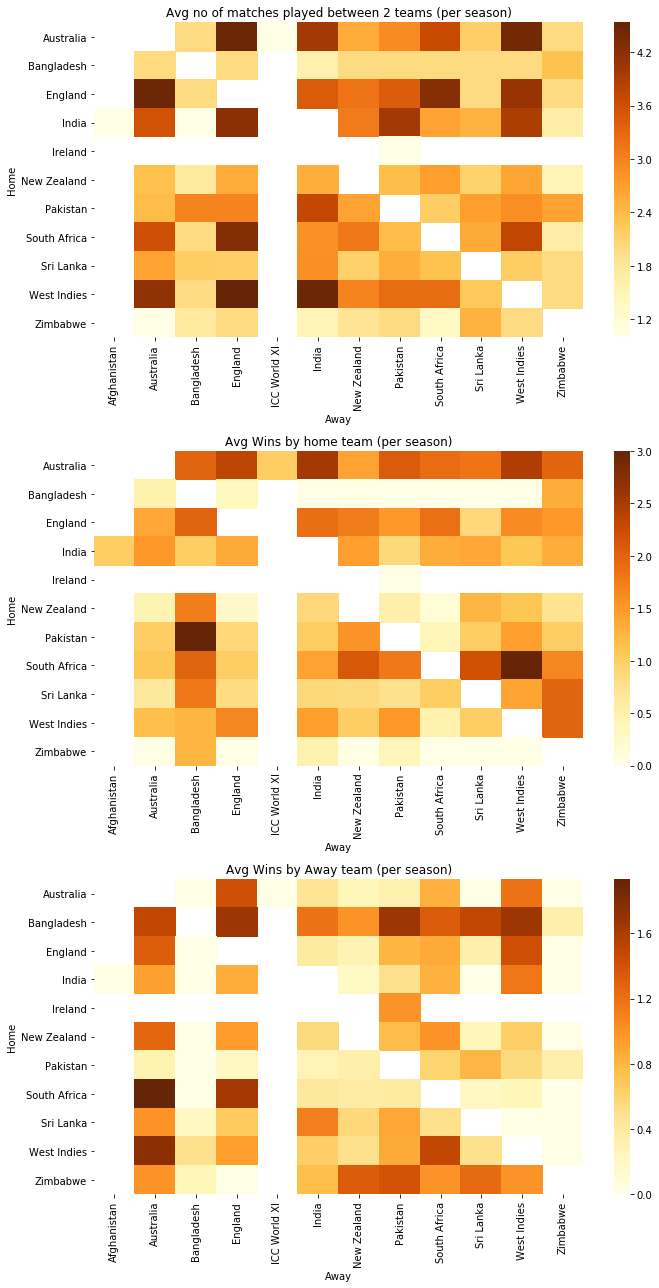

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

sns.heatmap(series_df_pivot['total_matches'], cmap='YlOrBr', ax=ax[0])
ax[0].set_title('Avg no of matches played between 2 teams (per season)')

sns.heatmap(series_df_pivot['home_wins'], cmap='YlOrBr', ax=ax[1])
ax[1].set_title('Avg Wins by home team (per season)')

sns.heatmap(series_df_pivot['away_wins'], cmap='YlOrBr', ax=ax[2])
ax[2].set_title('Avg Wins by Away team (per season)')

plt.tight_layout()

In [40]:
# lets check for total matches played, wins and draws by a team across years
series_home = series_df_cleaned.groupby(['Home', 'start'])['home_wins', 'matches_drawn', 'total_matches'].sum()
series_away = series_df_cleaned.groupby(['Away', 'start'])['away_wins', 'matches_drawn', 'total_matches'].sum()

In [41]:
df3 = pd.concat([series_home, series_away], axis=1).sort_index()
df3 = df3.fillna(0)
df3 = df3.groupby(level=0, axis=1).apply(lambda x: x.apply(sum, axis=1))
df3['total_wins'] = df3['away_wins'] + df3['home_wins']
df3['percent_wins'] = (df3['total_wins']/df3['total_matches'])*100
df3 = df3.drop(columns=['away_wins', 'home_wins'])

In [42]:
df3.index = df3.index.set_levels([df3.index.levels[0], pd.to_datetime(df3.index.levels[1], format='%Y')])
df3.index.names = ['Country', 'Date']
df3.head()

matches_drawn  total_matches  total_wins  percent_wins
Country     Date                                                              
Afghanistan 2018-01-01            0.0            1.0         0.0           0.0
Australia   1876-01-01            0.0            2.0         1.0          50.0
            1878-01-01            0.0            1.0         1.0         100.0
            1880-01-01            0.0            1.0         0.0           0.0
            1881-01-01            2.0            4.0         2.0          50.0

In [43]:
print('Australia test team  across years')
agg_map = {'matches_drawn':'sum', 'total_matches': 'sum', 'total_wins': 'sum', 'percent_wins': 'mean'}
df3.loc['Australia'].groupby(pd.Grouper(freq='5A', level=0)).agg(agg_map).tail(6)

# df3.groupby(pd.Grouper(freq='10A', level=-1)).agg(agg_map)

# pd.to_datetime(df3.index, format='%Y')

Australia test team  across years


,matches_drawn,total_matches,total_wins,percent_wins
Date,,,,
1996-12-31,13.0,53.0,26.0,52.232323
2001-12-31,12.0,62.0,38.0,62.575092
2006-12-31,8.0,59.0,45.0,80.570028
2011-12-31,11.0,55.0,29.0,50.688645
2016-12-31,9.0,57.0,27.0,44.461538
2021-12-31,2.0,13.0,6.0,27.272727


Text(0,0.5,'% of wins for matches played')

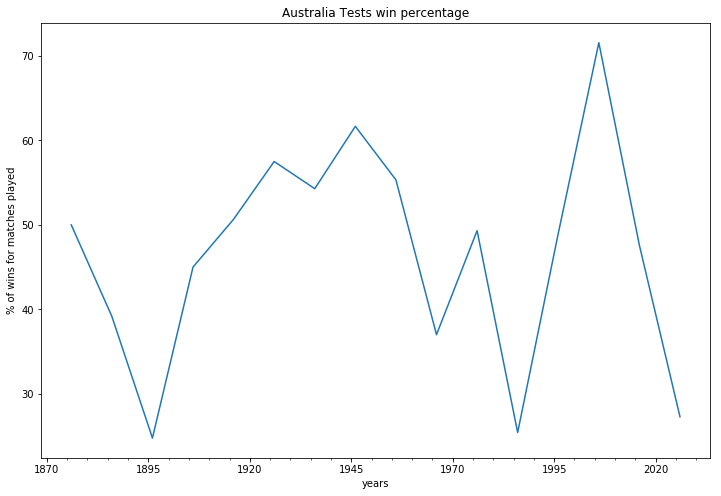

In [44]:
# plt.plot(df3.loc['Australia'].groupby(pd.Grouper(freq='5A', level=0))['percent_wins'].mean())

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df3.loc['Australia'].groupby(pd.Grouper(freq='10A', level=0))['percent_wins'].mean().plot(use_index=True, figsize=(12, 8))
ax.set_title('Australia Tests win percentage')
ax.set_xlabel('years')
ax.set_ylabel('% of wins for matches played')
# df3.loc['Australia']['total_matches'].plot(use_index=True)

### 3.1 Univariate Analysis

In [45]:
series_df_cleaned.head(2)

,Home,Away,start,end,winner,home_wins,away_wins,matches_drawn,total_matches
0,Australia,England,1876,1877,drawn,1,1,0,2
1,Australia,England,1878,1879,Australia,1,0,0,1
